# Exploratory Data Analysis

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd. read_csv('depression_data.csv')
# Drop name column
df.drop(columns='Name', inplace=True)
df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           413768 non-null  int64  
 1   Marital Status                413768 non-null  object 
 2   Education Level               413768 non-null  object 
 3   Number of Children            413768 non-null  int64  
 4   Smoking Status                413768 non-null  object 
 5   Physical Activity Level       413768 non-null  object 
 6   Employment Status             413768 non-null  object 
 7   Income                        413768 non-null  float64
 8   Alcohol Consumption           413768 non-null  object 
 9   Dietary Habits                413768 non-null  object 
 10  Sleep Patterns                413768 non-null  object 
 11  History of Mental Illness     413768 non-null  object 
 12  History of Substance Abuse    413768 non-nul

In [4]:
df.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


## Understanding Numeric Variables

### The following cell plots the distribution of numeric variables

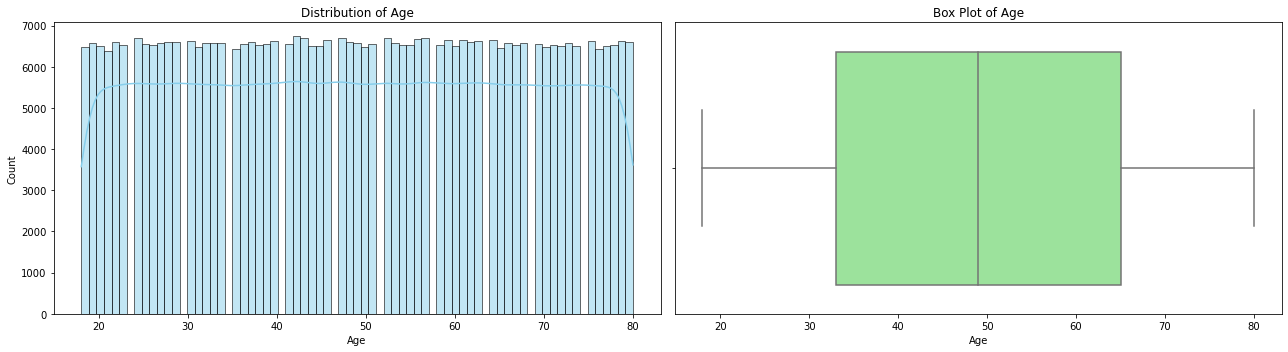

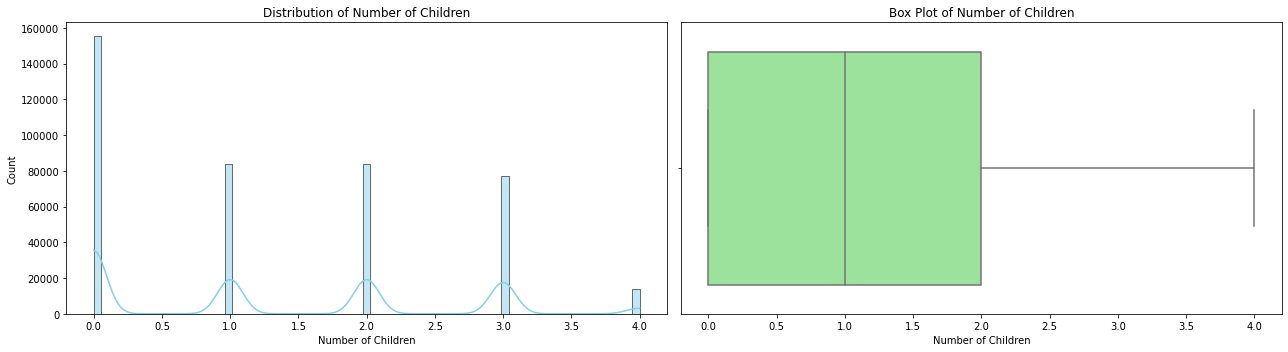

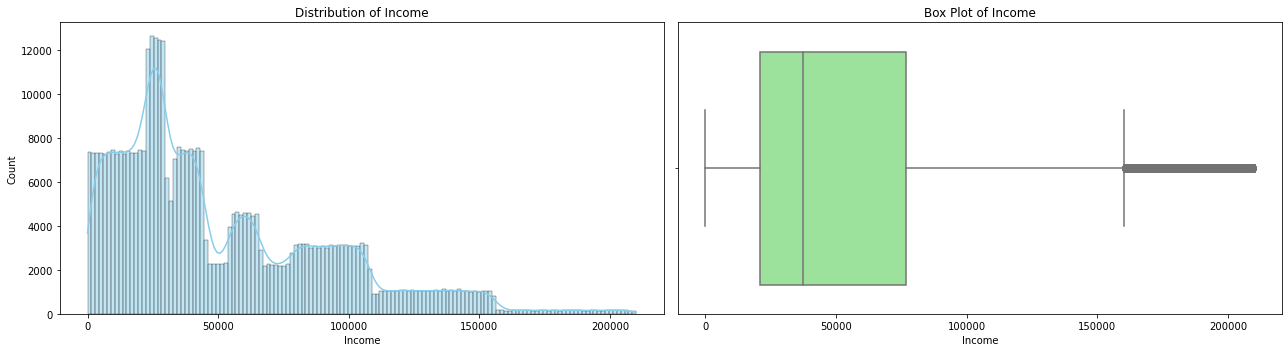

In [5]:
numeric_columns = ['Age', 'Number of Children', 'Income']

for col in numeric_columns:
    plt.figure(figsize=(18, 5))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Box Plot of {col}')

    plt.tight_layout()
    plt.show()

## Understanding Categorical Variables

### The following cell plots the distribution of categorical variables

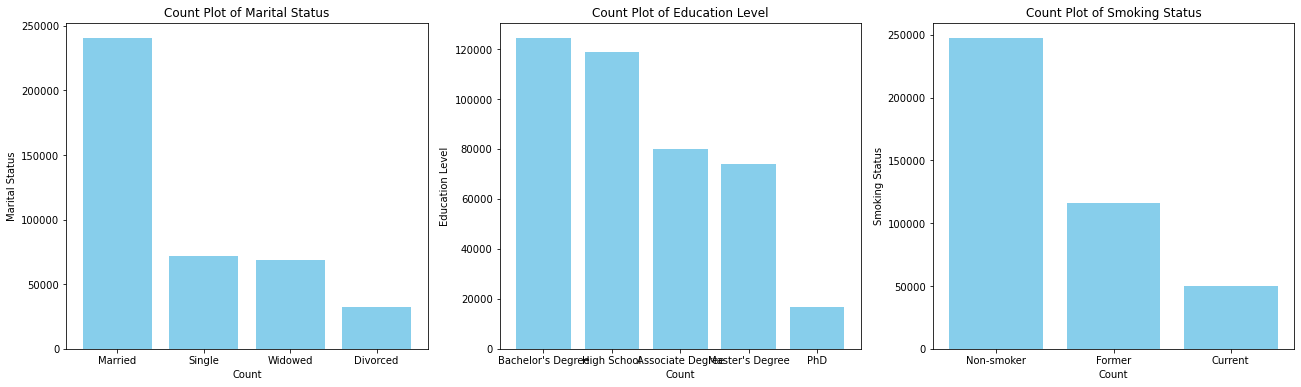

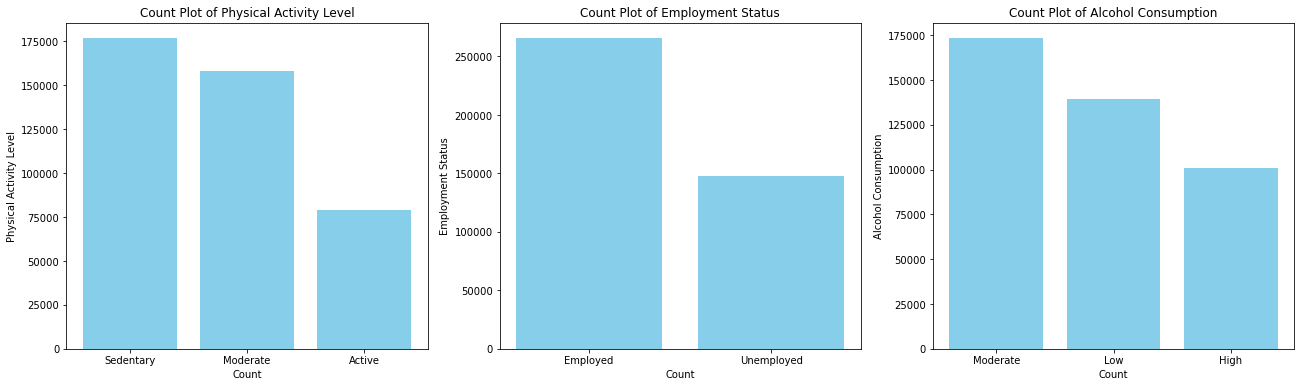

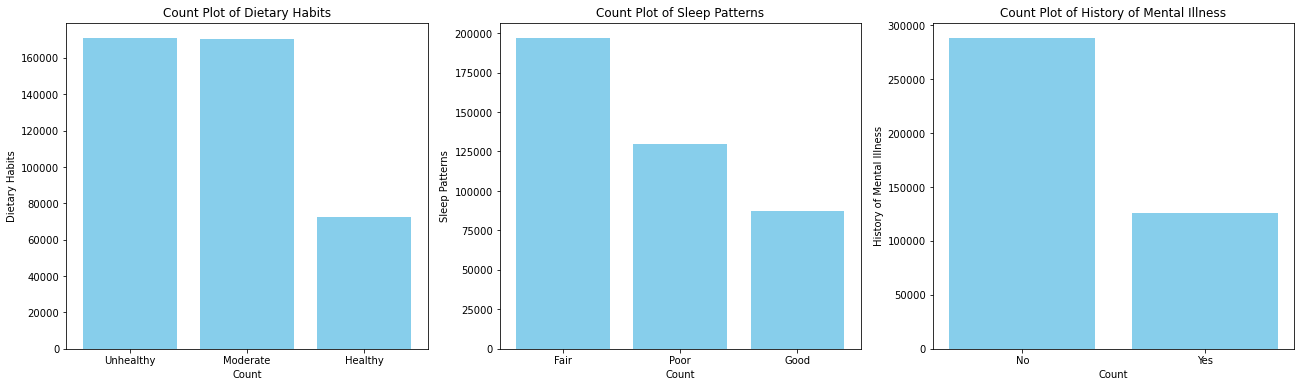

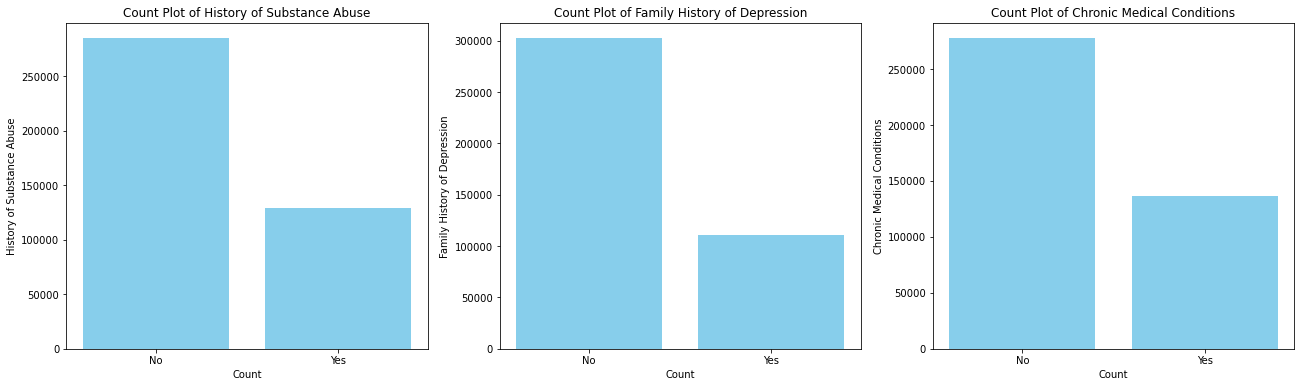

<Figure size 1584x432 with 0 Axes>

In [6]:
categorical_columns = ['Marital Status', 'Education Level', 'Smoking Status',
                       'Physical Activity Level', 'Employment Status', 'Alcohol Consumption',
                       'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness',
                       'History of Substance Abuse', 'Family History of Depression',
                       'Chronic Medical Conditions']
i = 1
plt.figure(figsize=(22, 6))
for col in categorical_columns:
    plt.subplot(1, 3, i)
    order = df[col].value_counts().index
    plt.bar(order, df[col].value_counts(), color='skyblue')
    plt.title(f'Count Plot of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    #
    #plt.tight_layout()

    i += 1
    if i == 4:
        i = 1
        plt.show()
        plt.figure(figsize=(22, 6))


## Transform categorical Variables

### The following cell transform categorical variables using one-hot encoding

In [7]:
# Identify categorical columns (object dtype)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Remove redundant columns
no_columns = [col for col in df_encoded.columns.tolist() if col.endswith('_No')]
df_reduced = df_encoded.drop(columns=no_columns)

df_reduced.head()

,Age,Number of Children,Income,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Marital Status_Widowed,Education Level_Associate Degree,Education Level_Bachelor's Degree,Education Level_High School,...,Dietary Habits_Healthy,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Sleep Patterns_Fair,Sleep Patterns_Good,Sleep Patterns_Poor,History of Mental Illness_Yes,History of Substance Abuse_Yes,Family History of Depression_Yes,Chronic Medical Conditions_Yes
0,31,2,26265.67,0,1,0,0,0,1,0,...,0,1,0,1,0,0,1,0,1,1
1,55,1,42710.36,0,1,0,0,0,0,1,...,0,0,1,1,0,0,1,0,0,1
2,78,1,125332.79,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,58,3,9992.78,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,18,0,8595.08,0,0,1,0,0,0,1,...,0,1,0,1,0,0,1,0,1,1


## Correlation Matrix

### Find if there are some correlated variables or interesting patterns

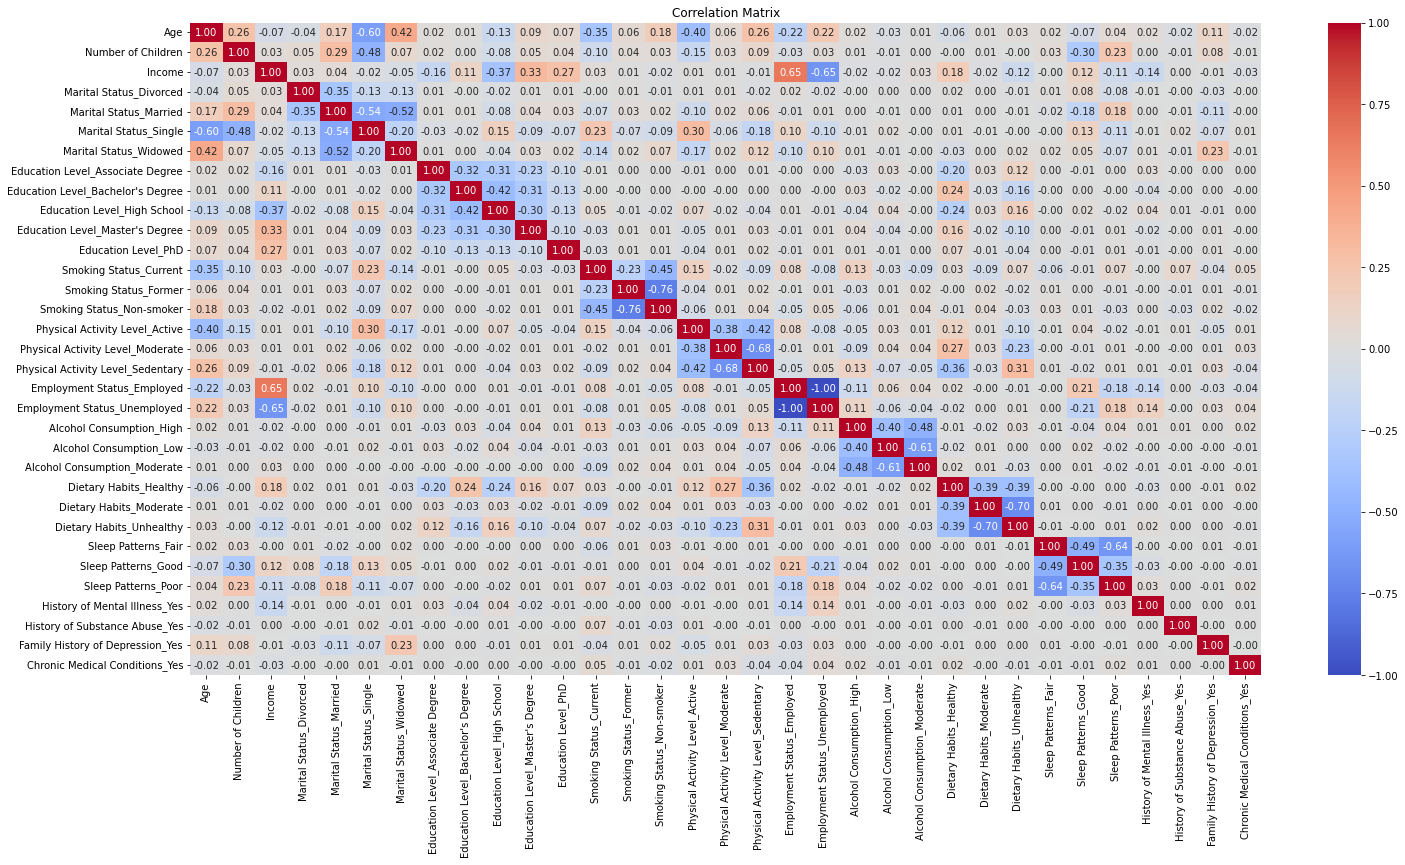

In [15]:
# Compute correlation matrix
corr_matrix = df_reduced.corr()

# Plot heatmap
plt.figure(figsize=(24, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


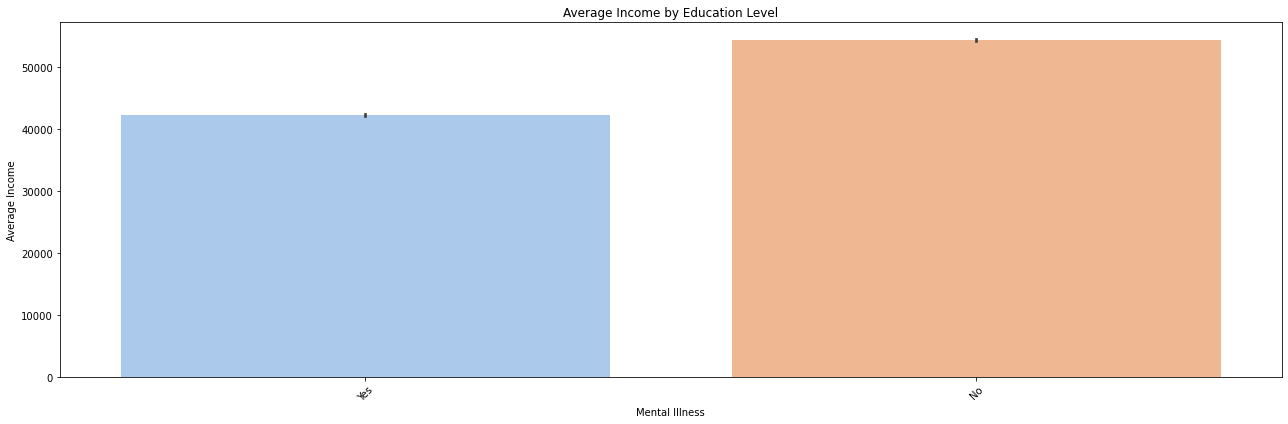

In [23]:
plt.figure(figsize=(18, 6))
sns.barplot(x='History of Mental Illness', y='Income', data=df, estimator=np.mean, palette='pastel')
plt.title('Average Income by Education Level')
plt.xlabel('Mental Illness')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


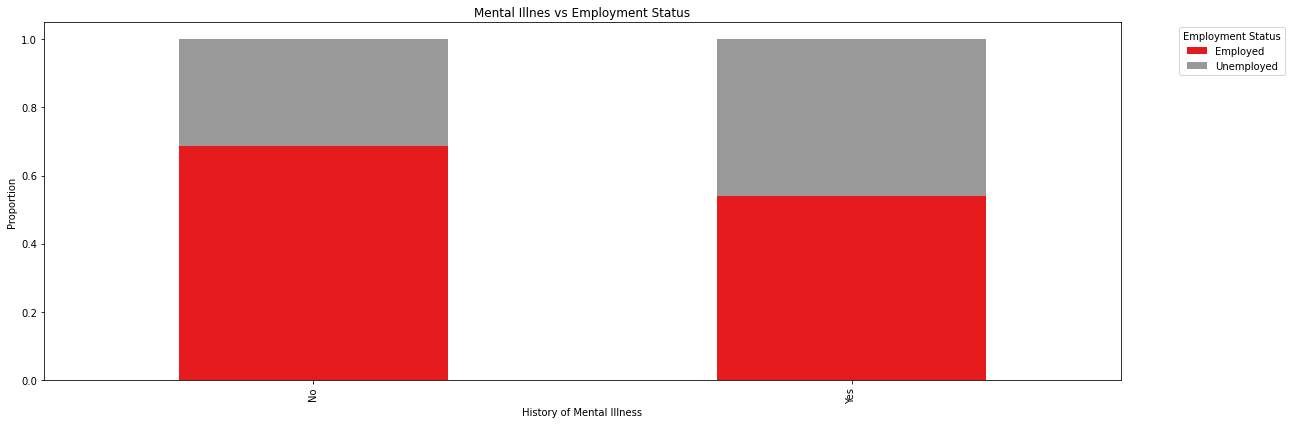

In [24]:
crosstab = pd.crosstab(df['History of Mental Illness'], df['Employment Status'], normalize='index')
crosstab.plot(kind='bar', stacked=True, colormap='Set1', figsize=(18, 6))
plt.title('Mental Illnes vs Employment Status')
plt.xlabel('History of Mental Illness')
plt.ylabel('Proportion')
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [25]:
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f'Number of outliers in {col}: {outliers.shape[0]}')


Number of outliers in Age: 0
Number of outliers in Number of Children: 0
Number of outliers in Income: 5157
